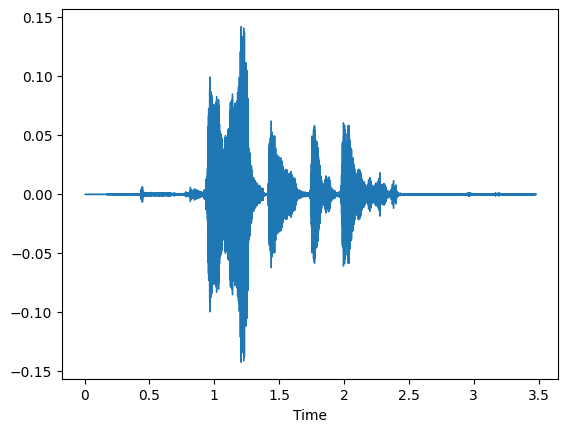

In [86]:
import librosa
import librosa.display
import IPython.display as ipd

y, sr = librosa.load("AI in Speech Processing.mp3")
librosa.display.waveshow(y)

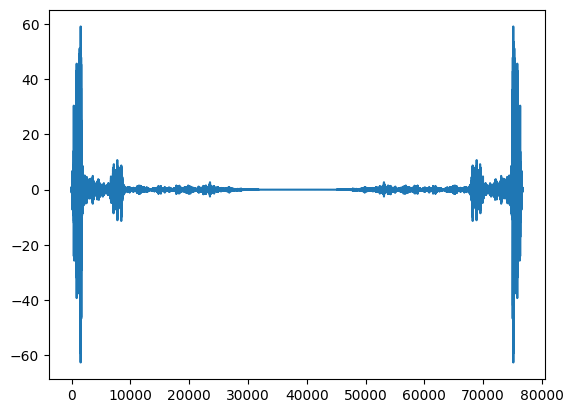

In [87]:
import numpy as np
import matplotlib.pyplot as plt
FFT_Signal = np.fft.fft(y)
plt.plot(FFT_Signal.real)

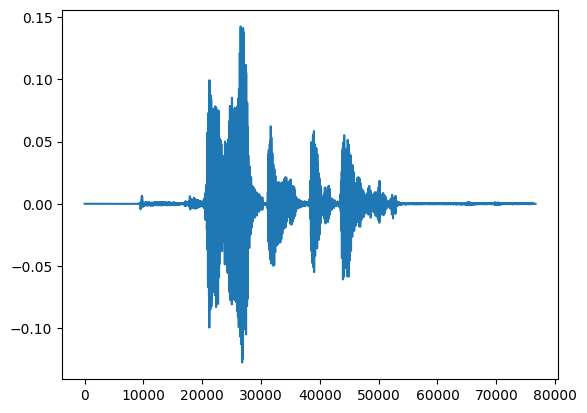

In [88]:
IFFT_Signal = np.fft.ifft(FFT_Signal)
plt.plot(IFFT_Signal)

Low-Pass Rectangular Filter

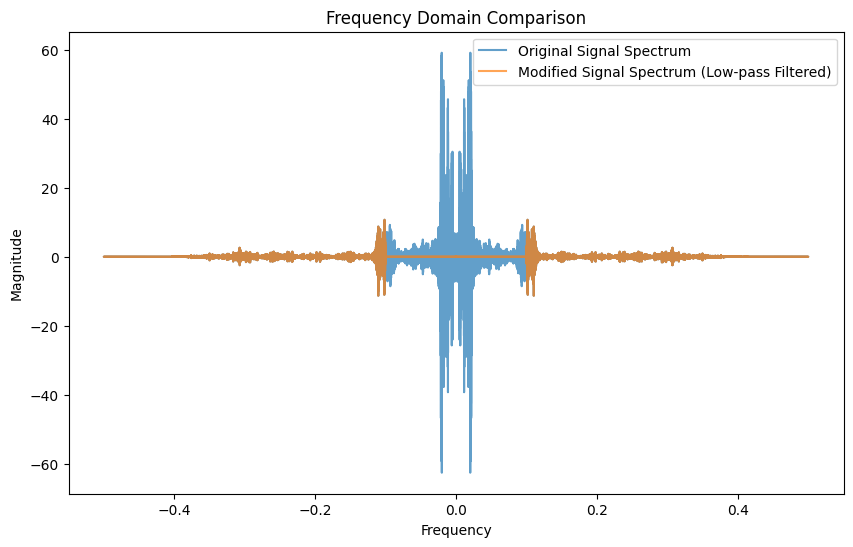

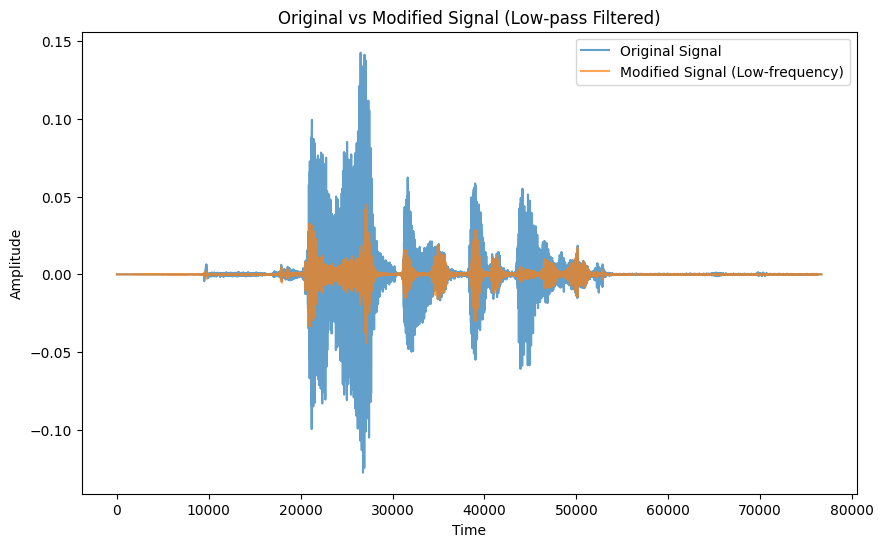

In [90]:
import numpy as np
import matplotlib.pyplot as plt

# Define your original signal
# Assuming y is already defined

# Perform FFT on the signal
FFT_Signal = np.fft.fft(y)

frequency = np.fft.fftfreq(len(y))

# Define the cutoff frequency for the low pass filter
cutoff_frequency = 0.1  # Adjust this value according to your requirement

# Determine the index corresponding to the cutoff frequency
cutoff_index = int(cutoff_frequency * len(FFT_Signal))

# Create a rectangular window for the low pass filter
rect_window = np.ones_like(FFT_Signal)
rect_window[:cutoff_index] = 0
rect_window[-cutoff_index:] = 0

# Apply the low pass filter to the FFT signal
filtered_FFT_Signal = FFT_Signal * rect_window

plt.figure(figsize=(10, 6))

# Plot original signal frequency spectrum
plt.plot(frequency, (FFT_Signal), label='Original Signal Spectrum', alpha=0.7)

# Plot modified signal frequency spectrum
plt.plot(frequency, (filtered_FFT_Signal), label='Modified Signal Spectrum (Low-pass Filtered)', alpha=0.7)

plt.title('Frequency Domain Comparison')
plt.xlabel('Frequency')
plt.ylabel('Magnitude')
plt.legend()

# Take the inverse FFT to get the modified signal
low_pass_filtered = np.fft.ifft(filtered_FFT_Signal)

# Plot both the original and modified signals in a single plot
plt.figure(figsize=(10, 6))

# Plot original signal
plt.plot(y, label='Original Signal', alpha=0.7)

# Plot modified signal
plt.plot(low_pass_filtered.real, label='Modified Signal (Low-frequency)', alpha=0.7)

plt.title('Original vs Modified Signal (Low-pass Filtered)')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.legend()

# Display the plot
plt.show()


In [91]:
#play low-pass audio signal
ipd.Audio(low_pass_filtered,rate=sr)

High Pass Filter 

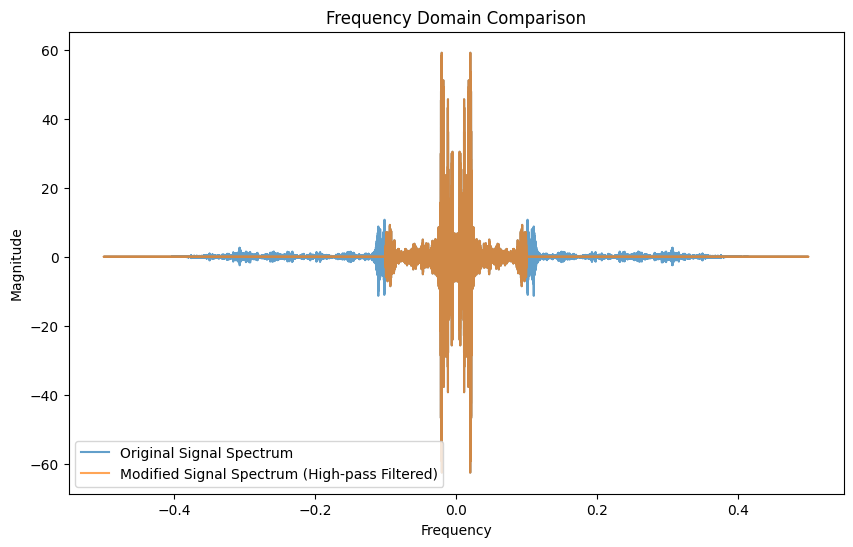

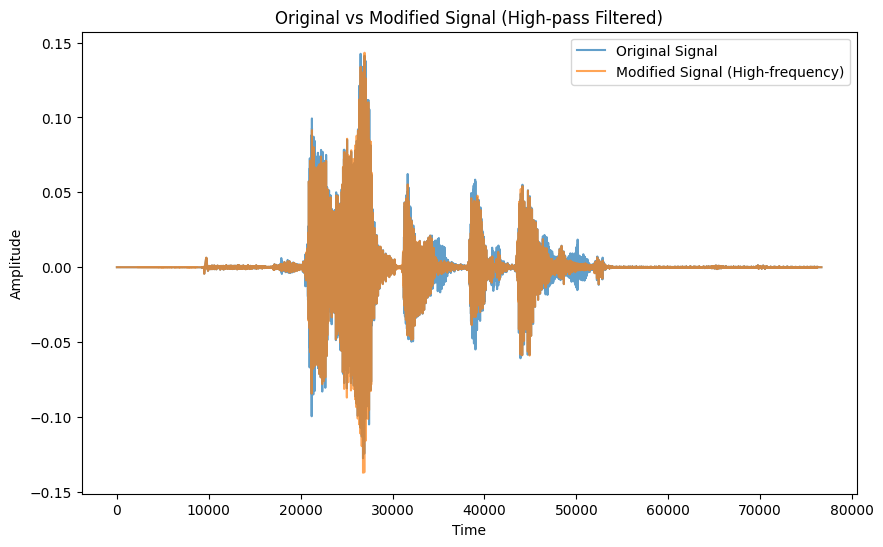

In [102]:
# Create a rectangular window for the high pass filter
rect_window = np.ones_like(FFT_Signal)
rect_window[cutoff_index:-cutoff_index] = 0

# Apply the high pass filter to the FFT signal
filtered_FFT_Signal = FFT_Signal * rect_window

plt.figure(figsize=(10, 6))

# Plot original signal frequency spectrum
plt.plot(frequency, (FFT_Signal), label='Original Signal Spectrum', alpha=0.7)

# Plot modified signal frequency spectrum
plt.plot(frequency, (filtered_FFT_Signal), label='Modified Signal Spectrum (High-pass Filtered)', alpha=0.7)

plt.title('Frequency Domain Comparison')
plt.xlabel('Frequency')
plt.ylabel('Magnitude')
plt.legend()

# Take the inverse FFT to get the modified signal
high_pass_filtered = np.fft.ifft(filtered_FFT_Signal)

# Plot both the original and modified signals in a single plot
plt.figure(figsize=(10, 6))

# Plot original signal
plt.plot(y, label='Original Signal', alpha=0.7)

# Plot modified signal
plt.plot(high_pass_filtered.real, label='Modified Signal (High-frequency)', alpha=0.7)

plt.title('Original vs Modified Signal (High-pass Filtered)')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.legend()

# Display the plot
plt.show()


In [93]:
#play high pass audio signal
ipd.Audio(high_pass_filtered,rate=sr)

Band-pass filter 

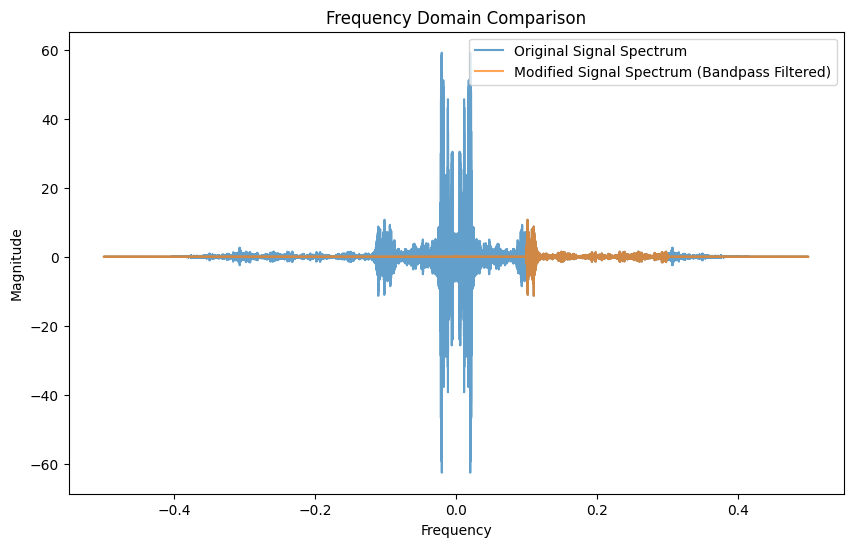

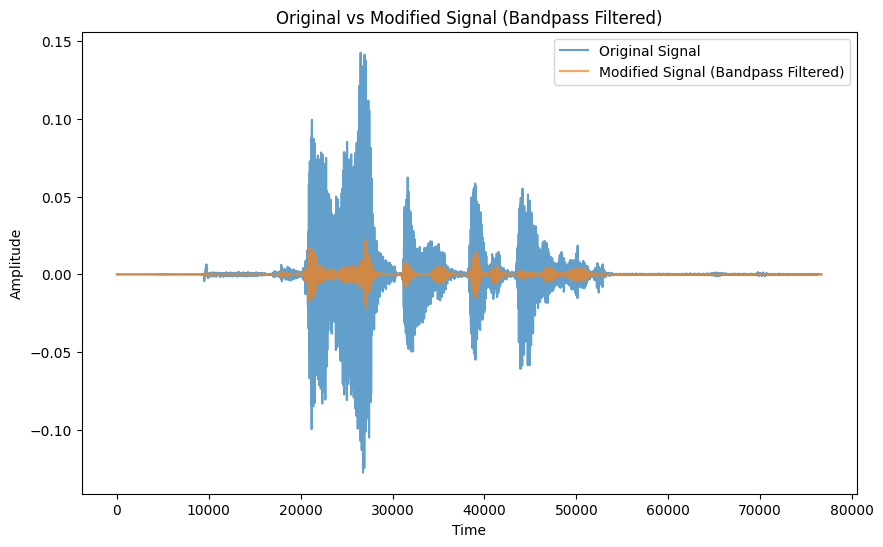

In [103]:
# Define the cutoff frequencies for the bandpass filter
low_cutoff_frequency = 0.1  # Adjust these values according to your requirement
high_cutoff_frequency = 0.3

# Determine the indices corresponding to the cutoff frequencies
low_cutoff_index = int(low_cutoff_frequency * len(FFT_Signal))
high_cutoff_index = int(high_cutoff_frequency * len(FFT_Signal))

# Create a rectangular window for the bandpass filter
rect_window = np.zeros_like(FFT_Signal)
rect_window[low_cutoff_index:high_cutoff_index] = 1

# Apply the bandpass filter to the FFT signal
filtered_FFT_Signal = FFT_Signal * rect_window

plt.figure(figsize=(10, 6))

# Plot original signal frequency spectrum
plt.plot(frequency, (FFT_Signal), label='Original Signal Spectrum', alpha=0.7)

# Plot modified signal frequency spectrum
plt.plot(frequency, (filtered_FFT_Signal), label='Modified Signal Spectrum (Bandpass Filtered)', alpha=0.7)

plt.title('Frequency Domain Comparison')
plt.xlabel('Frequency')
plt.ylabel('Magnitude')
plt.legend()

# Take the inverse FFT to get the modified signal
band_pass_filtered = np.fft.ifft(filtered_FFT_Signal)

# Plot both the original and modified signals in a single plot
plt.figure(figsize=(10, 6))

# Plot original signal
plt.plot(y, label='Original Signal', alpha=0.7)

# Plot modified signal
plt.plot(band_pass_filtered.real, label='Modified Signal (Bandpass Filtered)', alpha=0.7)

plt.title('Original vs Modified Signal (Bandpass Filtered)')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.legend()

# Display the plot
plt.show()


In [95]:
#play band pass audio signal
ipd.Audio(band_pass_filtered,rate=sr)

Gaussian Filter

In [24]:
pip install soundfile

DEPRECATION: Loading egg at c:\python312\lib\site-packages\vboxapi-1.0-py3.12.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation.. Discussion can be found at https://github.com/pypa/pip/issues/12330


In [25]:
pip install sounddevice


   ---------------------------------------- 0.0/199.7 kB ? eta -:--:--
   -- ------------------------------------- 10.2/199.7 kB ? eta -:--:--
   -- ------------------------------------- 10.2/199.7 kB ? eta -:--:--
   -- ------------------------------------- 10.2/199.7 kB ? eta -:--:--
   ----- --------------------------------- 30.7/199.7 kB 220.2 kB/s eta 0:00:01
   ----------- --------------------------- 61.4/199.7 kB 297.7 kB/s eta 0:00:01
   --------------------------- ---------- 143.4/199.7 kB 610.6 kB/s eta 0:00:01
   -------------------------------------- 199.7/199.7 kB 715.0 kB/s eta 0:00:00


DEPRECATION: Loading egg at c:\python312\lib\site-packages\vboxapi-1.0-py3.12.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation.. Discussion can be found at https://github.com/pypa/pip/issues/12330


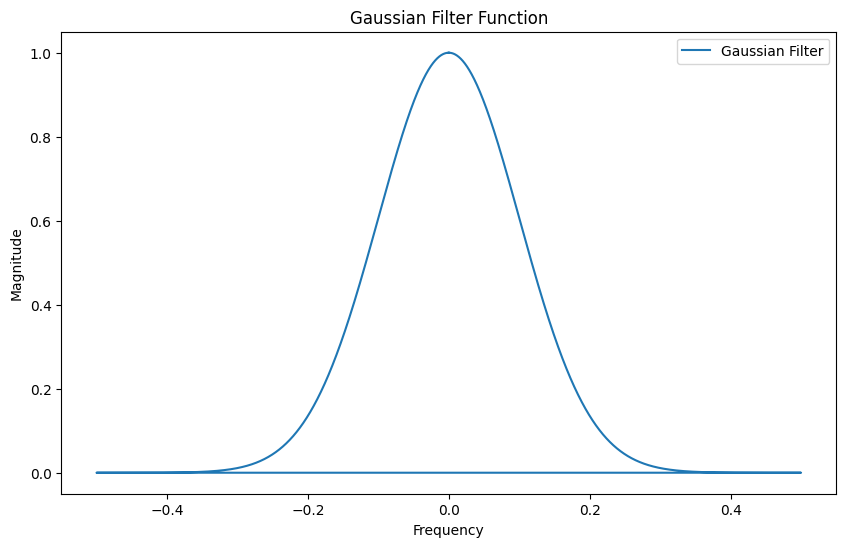

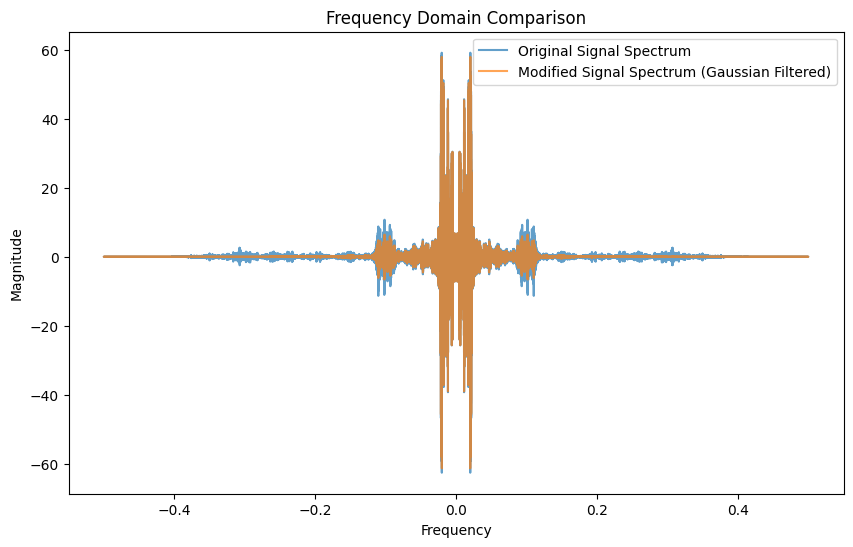

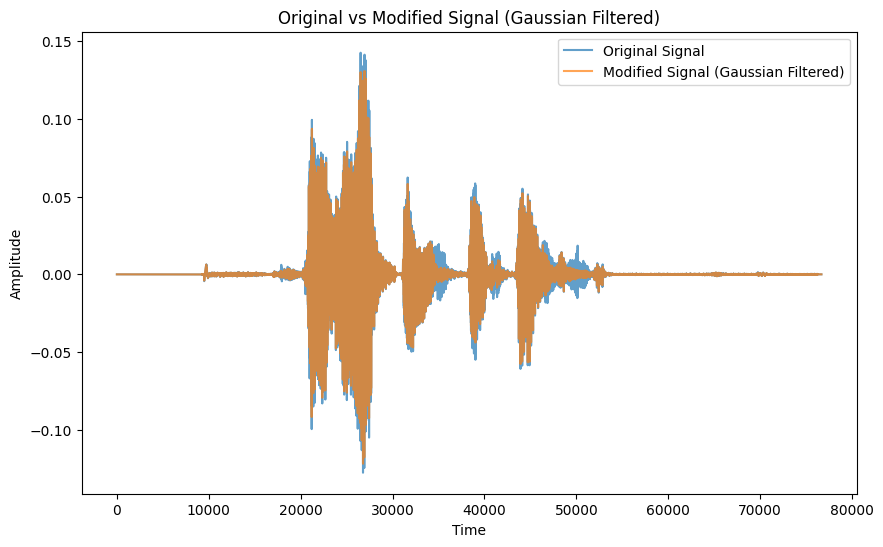

In [108]:
# Define the standard deviation for the Gaussian filter
sigma = 0.1 # Adjust this value according to your requirement

# Create a Gaussian window for the Gaussian filter
gaussian_window = np.exp(-0.5 * (frequency / sigma) ** 2)

# Apply the Gaussian filter to the FFT signal
filtered_FFT_Signal = FFT_Signal * gaussian_window

plt.figure(figsize=(10, 6))
plt.plot(frequency, gaussian_window, label='Gaussian Filter')
plt.title('Gaussian Filter Function')
plt.xlabel('Frequency')
plt.ylabel('Magnitude')
plt.legend()
plt.show() 

plt.figure(figsize=(10, 6))

# Plot original signal frequency spectrum
plt.plot(frequency, (FFT_Signal), label='Original Signal Spectrum', alpha=0.7)

# Plot modified signal frequency spectrum
plt.plot(frequency, (filtered_FFT_Signal), label='Modified Signal Spectrum (Gaussian Filtered)', alpha=0.7)

plt.title('Frequency Domain Comparison')
plt.xlabel('Frequency')
plt.ylabel('Magnitude')
plt.legend()

# Take the inverse FFT to get the modified signal
gausian_filtered = np.fft.ifft(filtered_FFT_Signal)

# Plot both the original and modified signals in a single plot
plt.figure(figsize=(10, 6))

# Plot original signal
plt.plot(y, label='Original Signal', alpha=0.7)

# Plot modified signal
plt.plot(gausian_filtered.real, label='Modified Signal (Gaussian Filtered)', alpha=0.7)

plt.title('Original vs Modified Signal (Gaussian Filtered)')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.legend()

# Display the plot
plt.show()




In [97]:
#play original audio signal
ipd.Audio(y,rate=sr)

In [107]:
#play Gaussian audio signal
ipd.Audio(gausian_filtered,rate=sr)

Cosine filter 

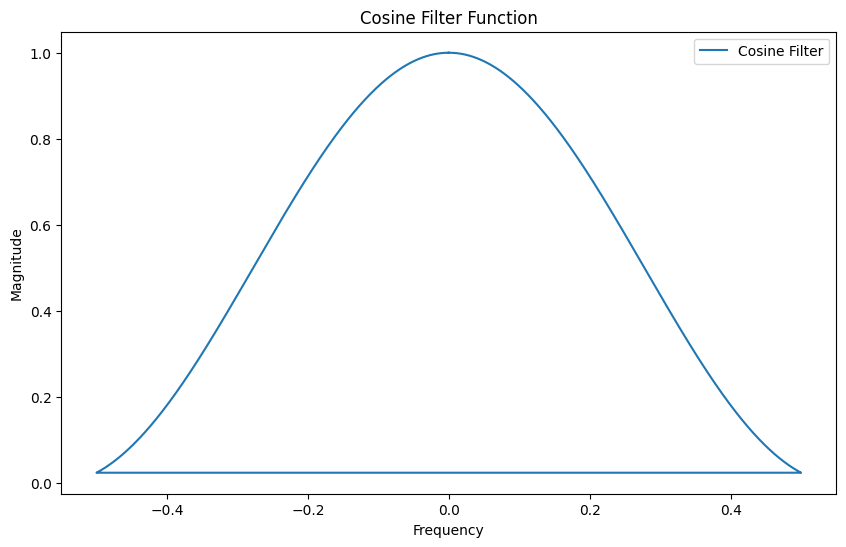

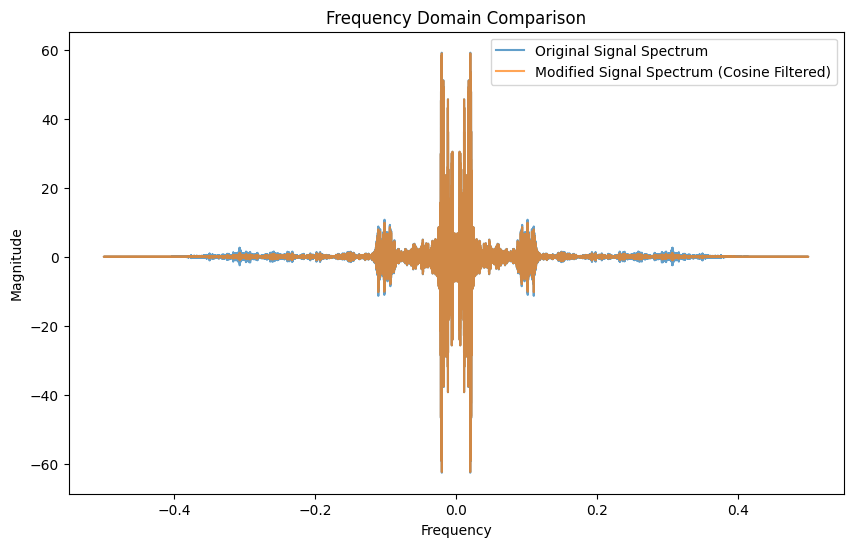

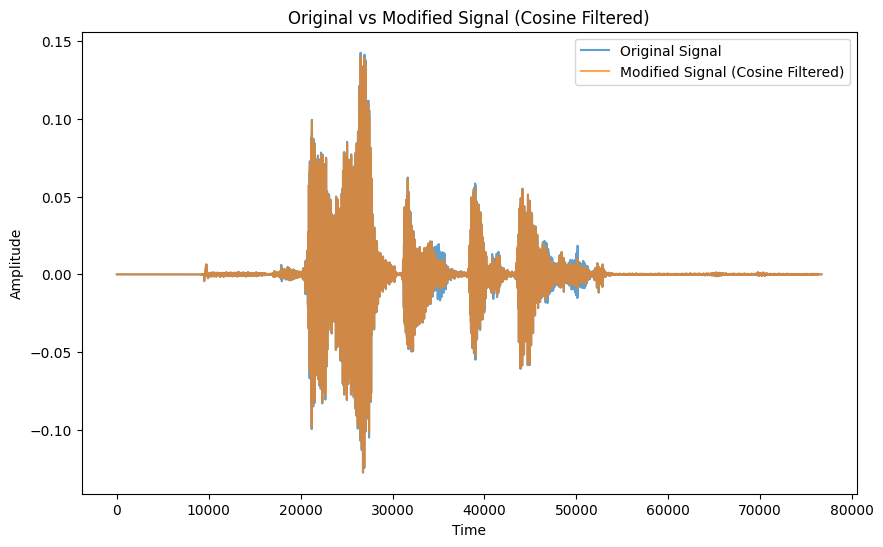

In [113]:
# Define the frequency for the Cosine filter
cosine_frequency = 0.9  # Adjust this value according to your requirement

# Create a Cosine window for the Cosine filter
cosine_window = 0.5 * (1 + np.cos(2 * np.pi * cosine_frequency * frequency))

# Apply the Cosine filter to the FFT signal
filtered_FFT_Signal = FFT_Signal * cosine_window

plt.figure(figsize=(10, 6))
plt.plot(frequency, cosine_window, label='Cosine Filter')
plt.title('Cosine Filter Function')
plt.xlabel('Frequency')
plt.ylabel('Magnitude')
plt.legend()
plt.show() 

plt.figure(figsize=(10, 6))

# Plot original signal frequency spectrum
plt.plot(frequency, (FFT_Signal), label='Original Signal Spectrum', alpha=0.7)

# Plot modified signal frequency spectrum
plt.plot(frequency, (filtered_FFT_Signal), label='Modified Signal Spectrum (Cosine Filtered)', alpha=0.7)

plt.title('Frequency Domain Comparison')
plt.xlabel('Frequency')
plt.ylabel('Magnitude')
plt.legend()

# Take the inverse FFT to get the modified signal
cosine_filtered = np.fft.ifft(filtered_FFT_Signal)

# Plot both the original and modified signals in a single plot
plt.figure(figsize=(10, 6))

# Plot original signal
plt.plot(y, label='Original Signal', alpha=0.7)

# Plot modified signal
plt.plot(cosine_filtered.real, label='Modified Signal (Cosine Filtered)', alpha=0.7)

plt.title('Original vs Modified Signal (Cosine Filtered)')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.legend()

# Display the plot
plt.show()


In [100]:
#play Gaussian audio signal
ipd.Audio(cosine_filtered,rate=sr)